# Traffic Accident Analysis
---
* In this project, we analyzed traffic accidents dataset in UK between 2000 and 2016. If you wish to preview data, you could go to link https://www.kaggle.com/datasets/daveianhickey/2000-16-traffic-flow-england-scotland-wales?select=Areas.shp
* We dropped some features and only consider the fact that some specified features may have effect on traffic accident reports. 
* And than, we observed the traffic accidents report which varies from 2005 to 2014 and within weekdays
* Last but not least, we try to identify whether urban or rural areas have more traffic accidents


In [29]:
# importing essential libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# read our comma-seperated values via pandas read_csv
data1 = pd.read_csv("/accidents_2005_to_2007.csv",low_memory=False)
data2 = pd.read_csv("/accidents_2009_to_2011.csv",low_memory=False)
data3 = pd.read_csv("/accidents_2012_to_2014.csv",low_memory=False)
flow =  pd.read_csv("/ukTrafficAADF.csv",low_memory=False)

In [31]:
# by concatenating, we combine all years into one big_data
# and we previewed first 5 row with head command
big_data = pd.concat([data1, data2, data3])
big_data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [32]:
# overall statistical data for our big_data
# we also converted big_data into transposed form just to see features in rows
big_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,1504049.0,439621.405078,95116.160326,64950.000000,375060.000000,439960.000000,523060.000000,6.553700e+05
Location_Northing_OSGR,1504049.0,300158.403995,161008.382735,10290.000000,178260.000000,268830.000000,398151.000000,1.208800e+06
Longitude,1504049.0,-1.436625,1.398078,-7.516225,-2.373902,-1.403714,-0.221510,1.759398e+00
Latitude,1504049.0,52.589399,1.449889,49.912941,51.490156,52.309126,53.478581,6.075754e+01
Police_Force,1504150.0,30.205364,25.516033,1.000000,6.000000,30.000000,45.000000,9.800000e+01
Accident_Severity,1504150.0,2.838190,0.401842,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,1504150.0,1.831606,0.714759,1.000000,1.000000,2.000000,2.000000,6.700000e+01
Number_of_Casualties,1504150.0,1.350960,0.825335,1.000000,1.000000,1.000000,1.000000,9.300000e+01
Day_of_Week,1504150.0,4.118607,1.924405,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),1504150.0,347.614855,259.429163,1.000000,110.000000,322.000000,518.000000,9.410000e+02


In [33]:
# learning about data types for each feature
big_data.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [34]:
# seeing how many rows and columns there are in this big_data
big_data.shape

(1504150, 33)

In [35]:
# we dropped some of features and only kept these features that might have effect on traffic accidents. 
big_data = big_data.loc[:,["Accident_Severity",
                 "Number_of_Vehicles",
                 "Number_of_Casualties",
                 "Date","Day_of_Week",
                 "Time", "Road_Type", "Carriageway_Hazards",
                 "Speed_limit","Light_Conditions",
                 "Weather_Conditions","Road_Surface_Conditions",
                 "Year","Urban_or_Rural_Area"]]

In [36]:
# searching for whether there are missing values or not
big_data.isnull().sum()

Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Date                          0
Day_of_Week                   0
Time                        117
Road_Type                     0
Carriageway_Hazards          29
Speed_limit                   0
Light_Conditions              0
Weather_Conditions          126
Road_Surface_Conditions    1958
Year                          0
Urban_or_Rural_Area           0
dtype: int64

In [37]:
# we dropped missing values and updated our big_data
big_data.dropna(inplace=True)

In [38]:
# checking for missing values again, just to be sure
big_data.isnull().sum()

Accident_Severity          0
Number_of_Vehicles         0
Number_of_Casualties       0
Date                       0
Day_of_Week                0
Time                       0
Road_Type                  0
Carriageway_Hazards        0
Speed_limit                0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Year                       0
Urban_or_Rural_Area        0
dtype: int64

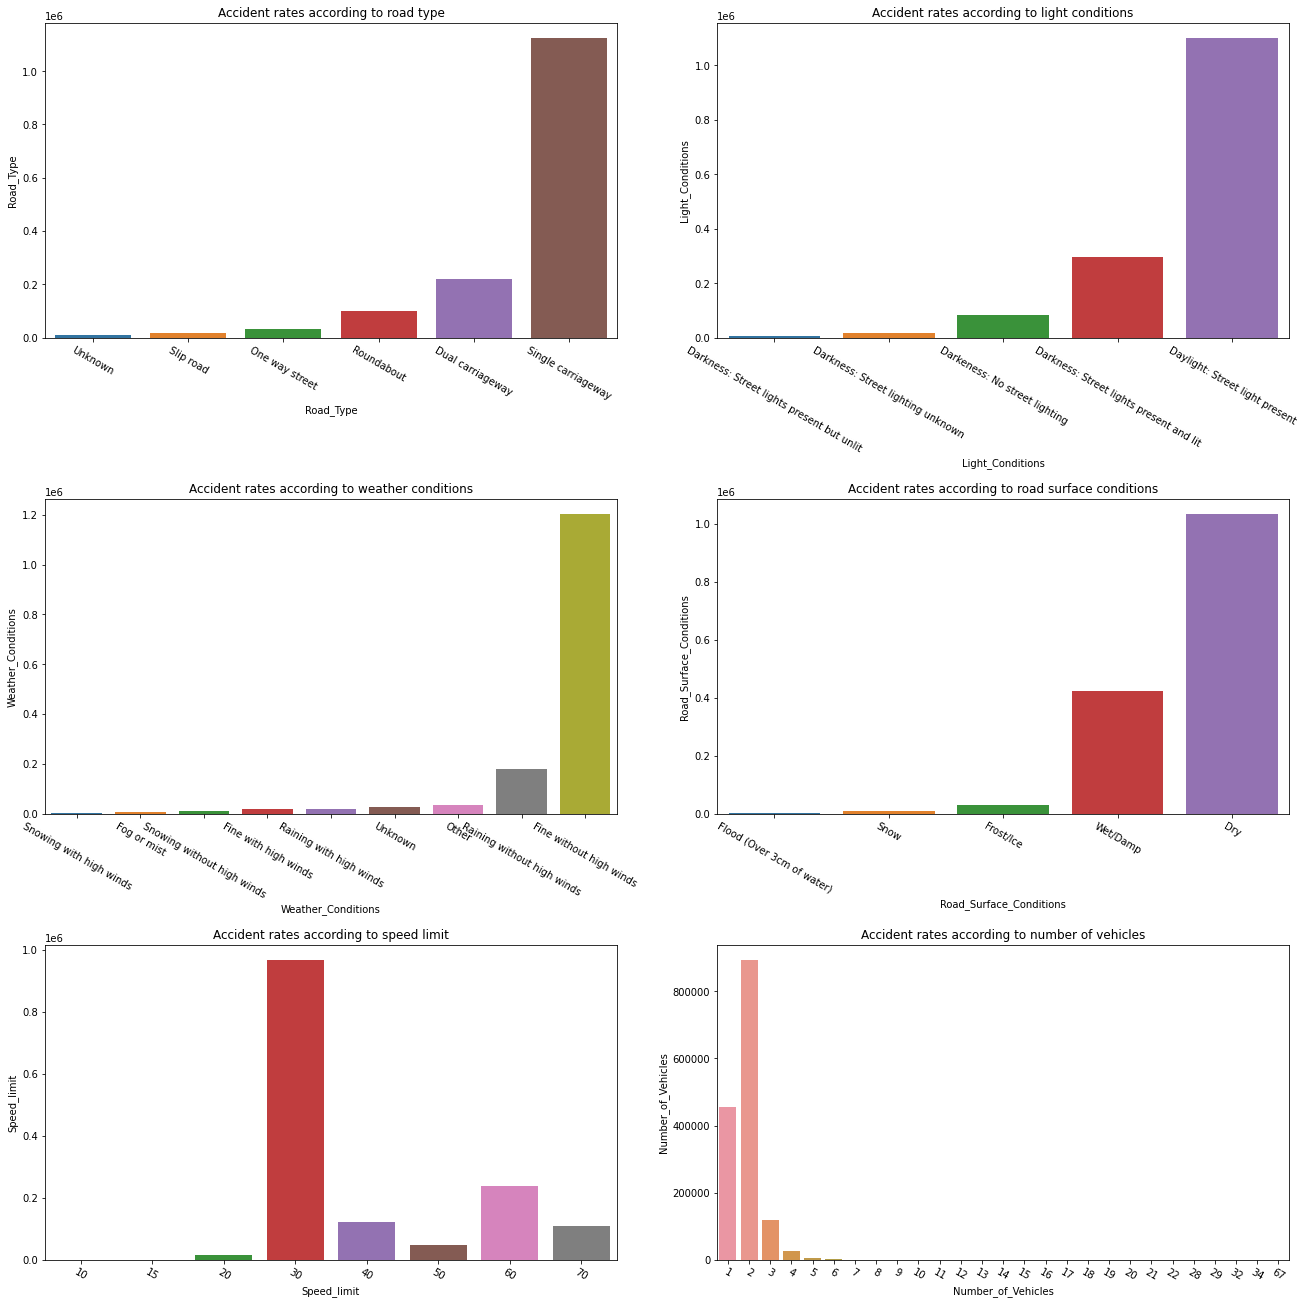

In [39]:
# creating groupby with some features which means presenting accidents according to Road Type
# after that, we sum up with 6 different barplots for each feature 
f, axs = plt.subplots(3,2, figsize= (18,18), constrained_layout=True)

road_type = big_data.groupby("Road_Type")
sum_road_type = pd.DataFrame(road_type.size().sort_values(ascending=True), columns=["Road_Type"])
light_conditions = big_data.groupby("Light_Conditions")
sum_light_conditions = pd.DataFrame(light_conditions.size().sort_values(ascending=True), columns=["Light_Conditions"])
weather_conditions = big_data.groupby("Weather_Conditions")
sum_weather_conditions = pd.DataFrame(weather_conditions.size().sort_values(ascending=True), columns=["Weather_Conditions"])
road_surface_conditions = big_data.groupby("Road_Surface_Conditions")
sum_road_surface_conditions = pd.DataFrame(road_surface_conditions.size().sort_values(ascending=True), columns=["Road_Surface_Conditions"])
speed_limit = big_data.groupby("Speed_limit")
sum_speed_limit = pd.DataFrame(speed_limit.size().sort_values(ascending=True), columns=["Speed_limit"])
number_of_vehicles = big_data.groupby("Number_of_Vehicles")
sum_number_of_vehicles = pd.DataFrame(number_of_vehicles.size().sort_values(ascending=True), columns=["Number_of_Vehicles"])

ax = sns.barplot( x=sum_road_type.index, y=sum_road_type["Road_Type"], data=sum_road_type, ax= axs[0,0])
ax.tick_params(axis= "x", rotation = -30)
axs[0,0].title.set_text("Accident rates according to road type")
ax = sns.barplot( x=sum_light_conditions.index, y=sum_light_conditions["Light_Conditions"], data=sum_light_conditions, ax= axs[0,1])
ax.tick_params(axis= "x", rotation = -30)
axs[0,1].title.set_text("Accident rates according to light conditions")
ax = sns.barplot( x=sum_weather_conditions.index, y=sum_weather_conditions["Weather_Conditions"], data=sum_weather_conditions, ax= axs[1,0])
ax.tick_params(axis= "x", rotation = -30)
axs[1,0].title.set_text("Accident rates according to weather conditions")
ax = sns.barplot( x=sum_road_surface_conditions.index, y=sum_road_surface_conditions["Road_Surface_Conditions"], data=sum_road_surface_conditions, ax= axs[1,1])
ax.tick_params(axis= "x", rotation = -30)
axs[1,1].title.set_text("Accident rates according to road surface conditions")
ax = sns.barplot( x=sum_speed_limit.index, y=sum_speed_limit["Speed_limit"], data=sum_speed_limit, ax= axs[2,0])
ax.tick_params(axis= "x", rotation = -30)
axs[2,0].title.set_text("Accident rates according to speed limit")
ax = sns.barplot( x=sum_number_of_vehicles.index, y=sum_number_of_vehicles["Number_of_Vehicles"], data=sum_number_of_vehicles, ax= axs[2,1])
ax.tick_params(axis= "x", rotation = -30)
axs[2,1].title.set_text("Accident rates according to number of vehicles")

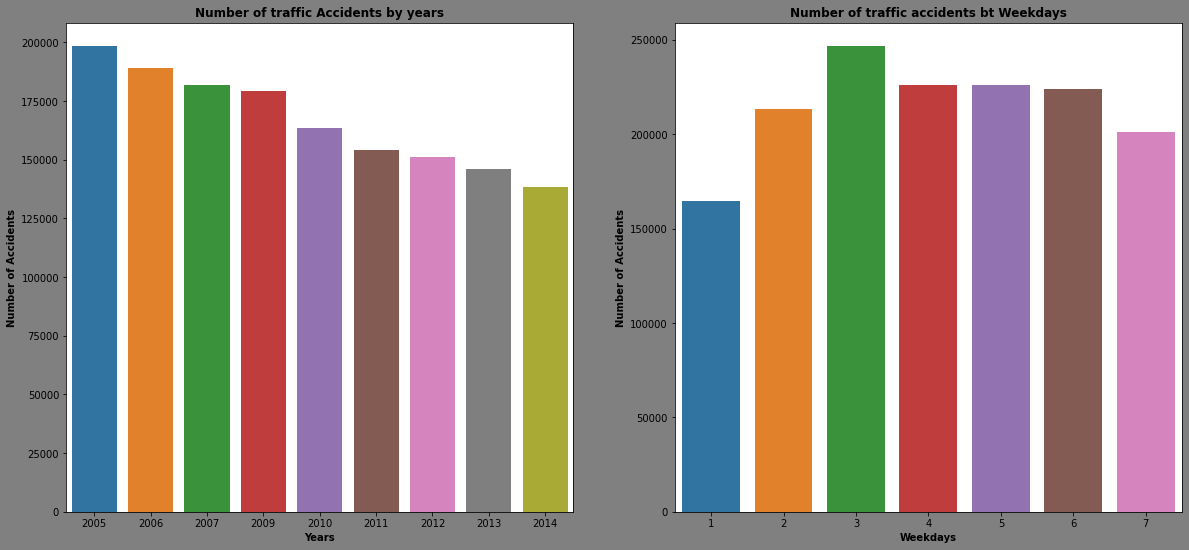

In [42]:
# dividing data into years and weekdays
# It means for each year and for weekdays, we present the traffic accidents 
year = big_data["Year"].value_counts().values
years = big_data["Year"].unique()
week = big_data["Day_of_Week"].value_counts().values
weeks = big_data["Day_of_Week"].unique()
plt.figure(figsize = (20,9),facecolor='grey')

plt.subplot(1, 2, 1)
sns.barplot(x = years, y = year)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Years",weight="bold")
plt.title("Number of traffic Accidents by years",weight="bold")

plt.subplot(1, 2, 2)
sns.barplot(x=weeks,y=week)
plt.xlabel("Weekdays",weight="bold")
plt.ylabel("Number of Accidents",weight="bold")
plt.title("Number of traffic accidents bt Weekdays",weight="bold")

plt.show()

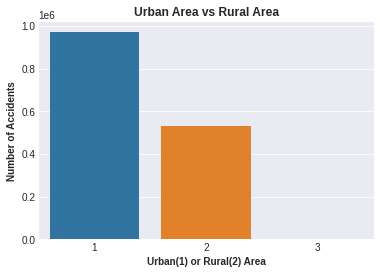

In [43]:
# And the last, estimation on traffic accidents depending on urban and rural ares
# we create countplot for this data
plt.style.use("seaborn-darkgrid")
sns.countplot(x="Urban_or_Rural_Area",data=big_data)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Urban(1) or Rural(2) Area",weight="bold")
plt.title("Urban Area vs Rural Area",weight="bold")
plt.show()